# ILTS empirically converges within four iterations

By executing the following code, we can observe the common trend under different numbers of sampled points.
That is, 
the normalized effective area of ILTS converges within four iterations,
and the effective area at final convergence is larger than that after the first iteration.

C:\Users\admin\AppData\Local\Temp\ipykernel_4428\3034823241.py:97: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


finish


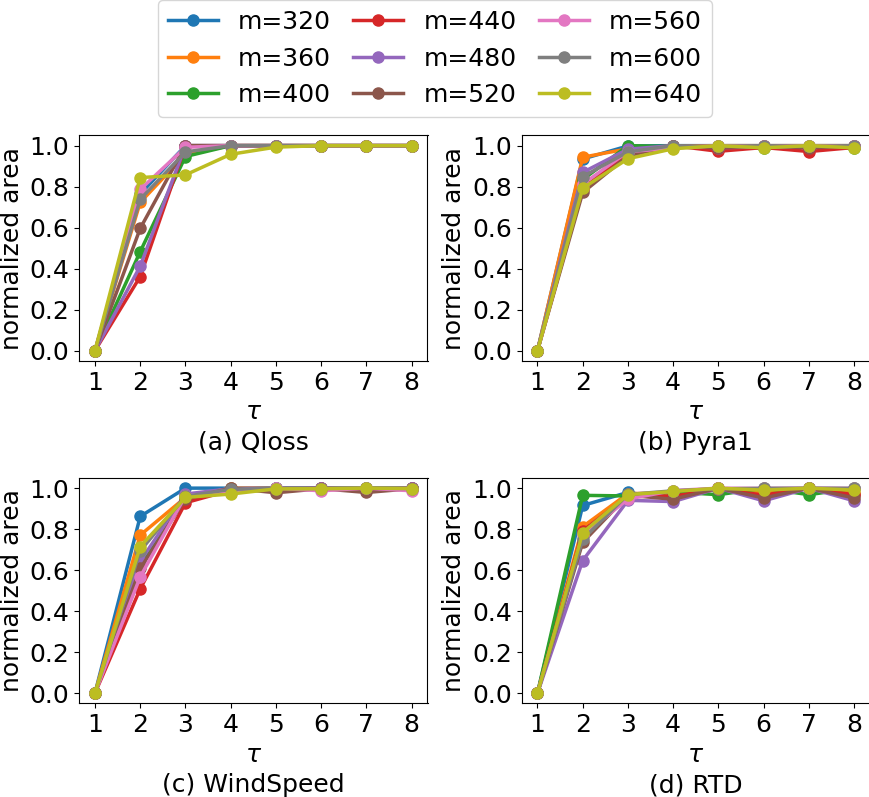

In [4]:
from myfuncs import *
import re

logDir="./converge"
resList=[]
resList.append(os.path.join(logDir,'log-Qloss.txt'))
resList.append(os.path.join(logDir,'log-Pyra1.txt'))
resList.append(os.path.join(logDir,'log-WindSpeed.txt'))
resList.append(os.path.join(logDir,'log-RTD.txt'))


def extract_nth_ILTS_iteration(log_text, n):
    pattern = r"LTTBETFurtherDownsampler effective area of all iterations \[([^\]]+)\]"
    matches = re.findall(pattern, log_text)
    if 1 <= n <= len(matches):
        tmp=matches[n-1].split()
        return np.array([float(x) for x in tmp])
    else:
        return None

fig, axs = plt.subplots(2,2,figsize=(9,7))
ax1=axs[0,0]
ax2=axs[0,1]
ax3=axs[1,0]
ax4=axs[1,1]
axes=[ax1,ax2,ax3,ax4]

titleList=[
    '(a) Qloss',
    '(b) Pyra1',
    '(c) WindSpeed',
    '(d) RTD'
]

font=18
lw=2.5
slw=1
ms=8
titlepos=-0.43

for i in range(len(resList)):
    plt.sca(axes[i])
    res=resList[i]
    with open(res, 'r') as file:
        log_text = file.read()

    b=extract_nth_ILTS_iteration(log_text,1)
    b=(b-min(b))/(max(b)-min(b)) # normalize
    plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=320")

    b=extract_nth_ILTS_iteration(log_text,2)
    b=(b-min(b))/(max(b)-min(b)) # normalize
    plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=360")

    b=extract_nth_ILTS_iteration(log_text,3)
    b=(b-min(b))/(max(b)-min(b)) # normalize
    plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=400")

    b=extract_nth_ILTS_iteration(log_text,4)
    b=(b-min(b))/(max(b)-min(b)) # normalize
    plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=440")

    b=extract_nth_ILTS_iteration(log_text,5)
    b=(b-min(b))/(max(b)-min(b)) # normalize
    plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=480")

    b=extract_nth_ILTS_iteration(log_text,6)
    b=(b-min(b))/(max(b)-min(b)) # normalize
    plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=520")

    b=extract_nth_ILTS_iteration(log_text,7)
    b=(b-min(b))/(max(b)-min(b)) # normalize
    plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=560")

    b=extract_nth_ILTS_iteration(log_text,8)
    b=(b-min(b))/(max(b)-min(b)) # normalize
    plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=600")

    b=extract_nth_ILTS_iteration(log_text,9)
    b=(b-min(b))/(max(b)-min(b)) # normalize
    plt.plot(np.arange(1,len(b)+1),b,'o-',markersize=ms,linewidth=lw,label="m=640")

    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)

    plt.xlabel(r"$\tau$",fontsize=font)
    plt.ylabel("normalized area", fontsize=font)
    
    plt.title(titleList[i],y=titlepos,fontsize=font)
    
    ax=plt.gca()
    handles, labels = ax.get_legend_handles_labels()

########################################
fig.legend(handles,labels,fontsize=font, ncol=3,bbox_to_anchor=(0.5,1.19), loc='upper center',columnspacing=0.9)
fig.tight_layout()
fig.show()

print('finish')

`resList` result files in the above code come from the following code, 
and you can run the following code to generate these files from scratch:

In [3]:
from myfuncs import *
import sys

logDir="./converge"
if not os.path.exists(logDir):
    os.makedirs(logDir)
resList=[]
resList.append(os.path.join(logDir,'log-Qloss.txt'))
resList.append(os.path.join(logDir,'log-Pyra1.txt'))
resList.append(os.path.join(logDir,'log-WindSpeed.txt'))
resList.append(os.path.join(logDir,'log-RTD.txt'))

# dataDir="../datasets"
dataDir="D://desktop//NISTPV"
d1=os.path.join(dataDir,"Qloss.csv")
d2=os.path.join(dataDir,"Pyra1.csv")
d3=os.path.join(dataDir,"WindSpeed.csv")
d4=os.path.join(dataDir,"RTD.csv")
dList=[d1,d2,d3,d4]

pngDir="./tmp" # after finish experiments, the figures in pngDir can be deleted
if not os.path.exists(pngDir):
    os.makedirs(pngDir)
        
for i in range(len(dList)):
    filename = dList[i]
    df=pd.read_csv(filename,header=None)
    v=df.iloc[:,1]
    v=v.to_numpy()
    t=np.arange(0,len(v))

    original_stdout = sys.stdout  # save effective area log
    with open(resList[i], 'w') as file:
        sys.stdout = file  # redirect to file
        try:
            noutArray=[320,480,740,1200,2000,3500,6000,10000,15000]
            anti=False
            lw=0.7
            width=2500
            height=1500
            dpi=72
            for j in range(len(noutArray)):
                nout=noutArray[j]
                name='LTTBETFurtherDownsampler' 
                downsample='LTTBETFurtherDownsampler'
                subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False)
        finally:
            sys.stdout = original_stdout
            
    print('log has been saved to {}'.format(resList[i]))

import shutil
if os.path.exists(pngDir):
    shutil.rmtree(pngDir)
    
print('finish')

log has been saved to ./converge\log-Qloss.txt
log has been saved to ./converge\log-Pyra1.txt
log has been saved to ./converge\log-WindSpeed.txt
log has been saved to ./converge\log-RTD.txt
finish
